<a href="https://colab.research.google.com/github/EyaMnasri/CS-Lab/blob/main/Final_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df=pd.read_csv("Book1.csv")
df.head(len(df))

,DATE(GMT),dY,DY,Tmax,Tmin,Wmin,Wmax,W(U2),RH,ea,SUN_SHINE(hh.mm),RAIN_FALL(mm),Tdew,ET0
0,2005,1,1,29.08,18.48,0.41,2.17,1.495,72.19,966.20,3.35,510,17.51,6.939016
1,2005,2,2,29.12,17.33,0.48,2.52,1.740,73.05,965.42,4.35,510,17.19,6.997626
2,2005,3,3,28.98,17.71,0.56,2.14,1.630,73.49,964.35,5.35,510,17.67,6.730055
3,2005,4,4,30.75,17.79,0.71,2.80,2.110,66.75,963.27,6.34,510,16.47,7.092442
4,2005,5,5,29.43,16.50,0.80,2.96,2.280,59.70,962.78,7.34,510,12.96,6.945964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2011,2196,2196,26.60,18.15,0.67,3.04,2.190,82.62,958.09,10.33,712,18.46,6.791016
2196,2011,2197,2197,26.29,17.88,0.83,2.52,2.090,81.18,957.50,10.33,712,17.83,6.800408
2197,2011,2198,2198,27.95,16.11,0.48,2.36,1.660,76.94,957.50,10.33,712,17.42,6.867660
2198,2011,2199,2199,28.80,18.23,0.09,1.53,0.855,75.87,957.11,10.33,712,18.64,7.421027


## Import required libraries

In [ ]:
import folium
import imageio
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from tqdm import tqdm_notebook
# from folium.plugins import MarkerCluster
# import geoplot as gplt
# import geopandas as gpd
# import geoplot.crs as gcrs
# import imageio
# import mapclassify as mc
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from datetime import datetime
import numpy as np

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Dataset Creation

###Column Details

In [ ]:
data=r"/content/drive/My Drive/Book1.csv"

Understanding the columns: http://www.fao.org/3/X0490E/x0490e08.htm

Date (GMT): Year

dy: index?

DY: ?

Tmax (°C): Maximun Temprature

Tmin (°C): Minimum Temprature

Wmin (m/s): Minimum Wind Speed

Wmax (m/s): Maximum Wind Speed

W(U2) (m/s): wind speed at 2 m above the ground

RH (%):Relative humidity is the ratio between the amount of water the ambient air actually holds and the amount it could hold at the same temperature

ea (kPa): Calculated Vapour Pressure 

SUN_SHINE(hh.mm): total sun in hours

RAIN_FALL(mm): rainfall in millimeter 

Tdew: dewpoint temperature

ET0: Evapotranspiration rate/evaporating power of the atmosphere



### Data Engineering

In [ ]:
df = pd.read_csv(data)
df['DATE(GMT)'] = df['DATE(GMT)'].astype(str)
df.drop('dY', inplace=True, axis=1)
df.drop('DY', inplace=True, axis=1)


In [ ]:
df.shape


(2200, 12)

In [ ]:
df.head()

,DATE(GMT),Tmax,Tmin,Wmin,Wmax,W(U2),RH,ea,SUN_SHINE(hh.mm),RAIN_FALL(mm),Tdew,ET0
0,2005,29.08,18.48,0.41,2.17,1.495,72.19,966.20,3.35,510,17.51,6.939016
1,2005,29.12,17.33,0.48,2.52,1.740,73.05,965.42,4.35,510,17.19,6.997626
2,2005,28.98,17.71,0.56,2.14,1.630,73.49,964.35,5.35,510,17.67,6.730055
3,2005,30.75,17.79,0.71,2.80,2.110,66.75,963.27,6.34,510,16.47,7.092442
4,2005,29.43,16.50,0.80,2.96,2.280,59.70,962.78,7.34,510,12.96,6.945964


In [ ]:
df['ET0'].index

RangeIndex(start=0, stop=2200, step=1)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE(GMT)         2200 non-null   object 
 1   Tmax              2200 non-null   float64
 2   Tmin              2200 non-null   float64
 3   Wmin              2200 non-null   float64
 4   Wmax              2200 non-null   float64
 5   W(U2)             2200 non-null   float64
 6   RH                2200 non-null   float64
 7   ea                2200 non-null   float64
 8   SUN_SHINE(hh.mm)  2200 non-null   float64
 9   RAIN_FALL(mm)     2200 non-null   int64  
 10  Tdew              2200 non-null   float64
 11  ET0               2200 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 206.4+ KB


In [ ]:
df.describe()

,Tmax,Tmin,Wmin,Wmax,W(U2),RH,ea,SUN_SHINE(hh.mm),RAIN_FALL(mm),Tdew,ET0
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,29.240109,19.676723,0.905264,2.937355,2.373941,74.466050,961.623100,6.484764,611.057727,18.474709,7.403666
std,3.525596,2.378550,0.672898,1.133307,1.193272,14.978585,2.652383,3.650507,77.575528,3.280962,0.557802
min,21.080000,12.210000,0.010000,0.470000,0.380000,28.260000,954.570000,0.000000,510.000000,3.350000,5.527386
25%,26.520000,18.757500,0.420000,2.100000,1.480000,64.750000,959.725000,3.307500,510.000000,17.027500,6.998016
50%,28.140000,20.220000,0.730000,2.800000,2.122500,80.365000,961.310000,8.170000,658.000000,19.925000,7.383500
75%,31.600000,21.160000,1.200000,3.632500,3.005000,86.215000,963.470000,9.450000,676.000000,20.740000,7.770567
max,38.600000,24.600000,4.070000,6.620000,7.260000,95.250000,969.130000,10.800000,712.000000,22.500000,9.044991


In [ ]:
df.ET0.unique()

array([6.93901637, 6.99762598, 6.73005486, ..., 6.86765974, 7.42102654,
       7.36356311])

In [ ]:
df.ET0.value_counts()

7.250278    1
7.574394    1
8.021902    1
7.670173    1
7.662190    1
           ..
8.289377    1
8.397291    1
6.519920    1
8.044006    1
7.251343    1
Name: ET0, Length: 2200, dtype: int64

In [ ]:
df.corr()

,Tmax,Tmin,Wmin,Wmax,W(U2),RH,ea,SUN_SHINE(hh.mm),RAIN_FALL(mm),Tdew,ET0
Tmax,1.000000,0.215802,-0.394819,-0.337085,-0.382715,-0.878026,0.050051,0.019455,-0.046402,-0.457692,0.568815
Tmin,0.215802,1.000000,0.169184,0.072887,0.130017,0.187044,-0.112456,0.021796,-0.024742,0.669261,0.542381
Wmin,-0.394819,0.169184,1.000000,0.852361,0.968674,0.414081,-0.066472,0.014721,-0.053511,0.329846,-0.240903
Wmax,-0.337085,0.072887,0.852361,1.000000,0.955528,0.301714,-0.049713,0.034845,-0.038755,0.175148,-0.250531
W(U2),-0.382715,0.130017,0.968674,0.955528,1.000000,0.376780,-0.061091,0.024848,-0.048579,0.269177,-0.254818
RH,-0.878026,0.187044,0.414081,0.301714,0.376780,1.000000,-0.106754,-0.005601,0.036179,0.815189,-0.322157
ea,0.050051,-0.112456,-0.066472,-0.049713,-0.061091,-0.106754,1.000000,-0.263095,-0.663294,-0.139448,-0.245494
SUN_SHINE(hh.mm),0.019455,0.021796,0.014721,0.034845,0.024848,-0.005601,-0.263095,1.000000,0.063837,0.006476,-0.002670
RAIN_FALL(mm),-0.046402,-0.024742,-0.053511,-0.038755,-0.048579,0.036179,-0.663294,0.063837,1.000000,0.005301,0.297947
Tdew,-0.457692,0.669261,0.329846,0.175148,0.269177,0.815189,-0.139448,0.006476,0.005301,1.000000,0.112247


In [ ]:
df_numerical = df.select_dtypes(include = [np.number])
df_correlations = df_numerical.corr(method='pearson')['ET0']
# Sort the features with the strongest correlated variable on th top
df_correlations[np.argsort(df_correlations, axis=0)[::-1]]

ET0                 1.000000
Tmax                0.568815
Tmin                0.542381
RAIN_FALL(mm)       0.297947
Tdew                0.112247
SUN_SHINE(hh.mm)   -0.002670
Wmin               -0.240903
ea                 -0.245494
Wmax               -0.250531
W(U2)              -0.254818
RH                 -0.322157
Name: ET0, dtype: float64

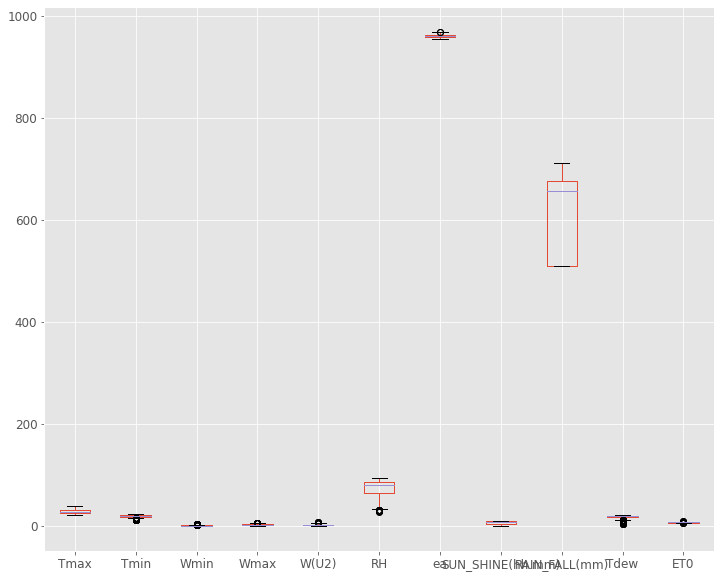

In [ ]:
df.boxplot()

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of       DATE(GMT)   Tmax   Tmin  ...  RAIN_FALL(mm)   Tdew    ET0
0         False  False  False  ...          False  False  False
1         False  False  False  ...          False  False  False
2         False  False  False  ...          False  False  False
3         False  False  False  ...          False  False  False
4         False  False  False  ...          False  False  False
...         ...    ...    ...  ...            ...    ...    ...
2195      False  False  False  ...          False  False  False
2196      False  False  False  ...          False  False  False
2197      False  False  False  ...          False  False  False
2198      False  False  False  ...          False  False  False
2199      False  False  False  ...          False  False  False

[2200 rows x 12 columns]>

In [ ]:
df.duplicated().sum() 

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


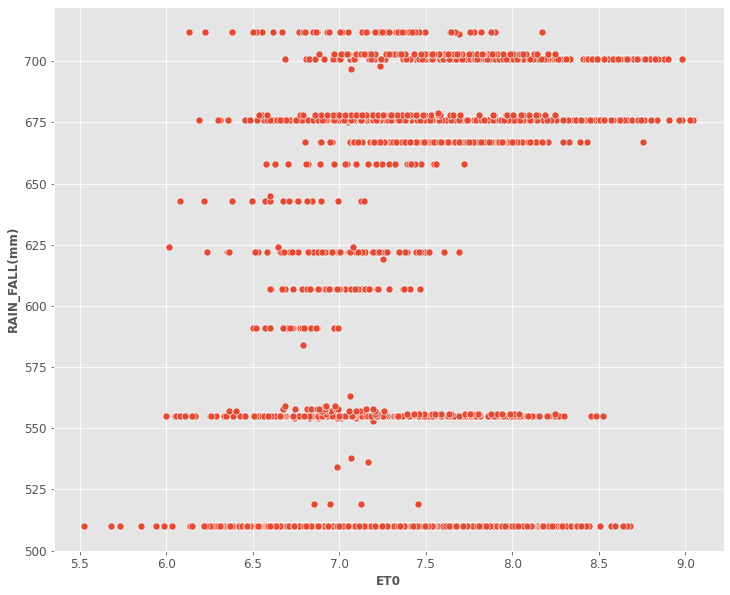

In [ ]:
sns.scatterplot(df['ET0'],df['RAIN_FALL(mm)'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


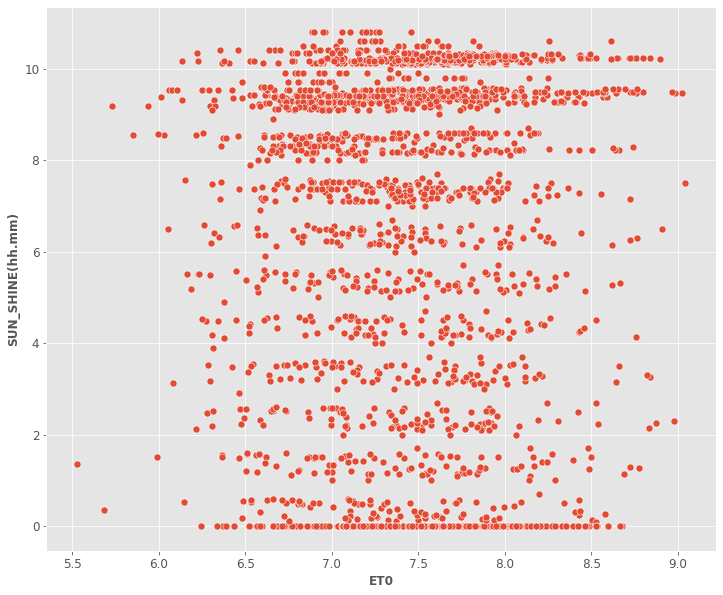

In [ ]:
sns.scatterplot(df['ET0'],df['SUN_SHINE(hh.mm)'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


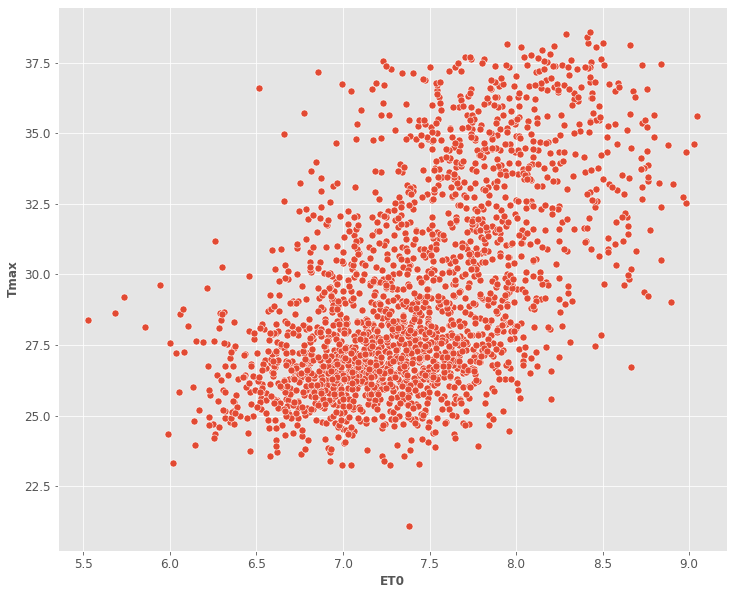

In [ ]:
sns.scatterplot(df['ET0'],df['Tmax'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


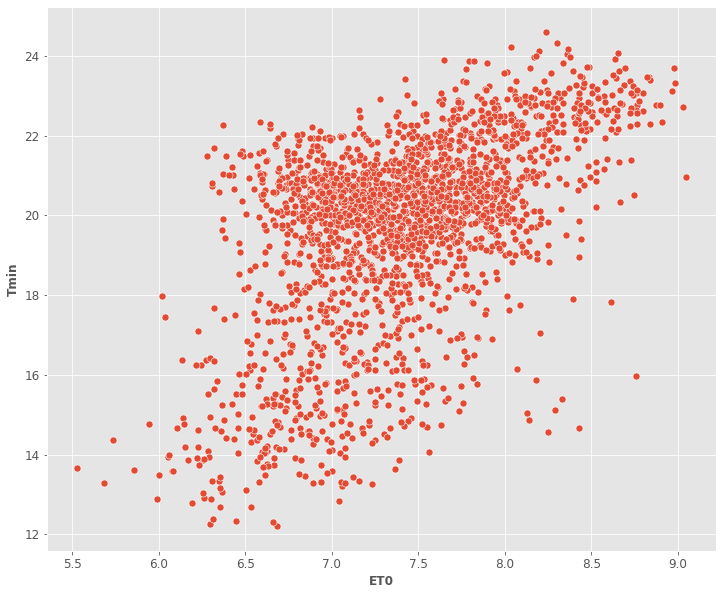

In [ ]:
sns.scatterplot(df['ET0'],df['Tmin'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


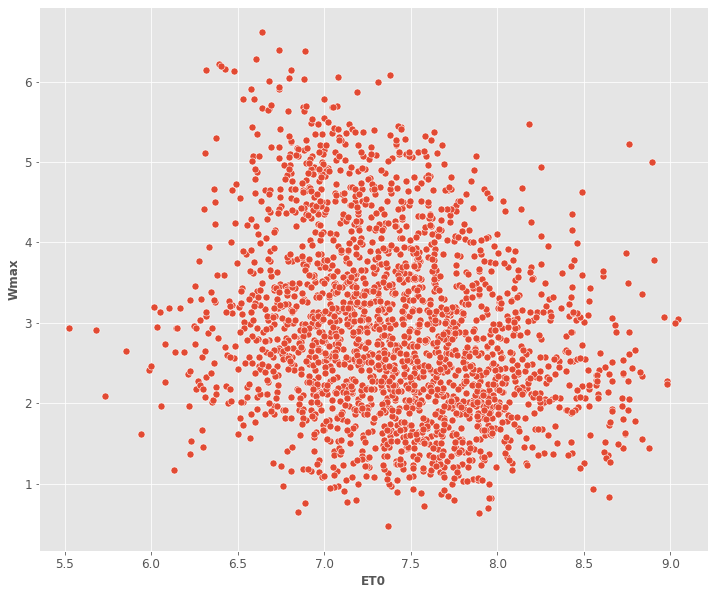

In [ ]:
sns.scatterplot(df['ET0'],df['Wmax'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


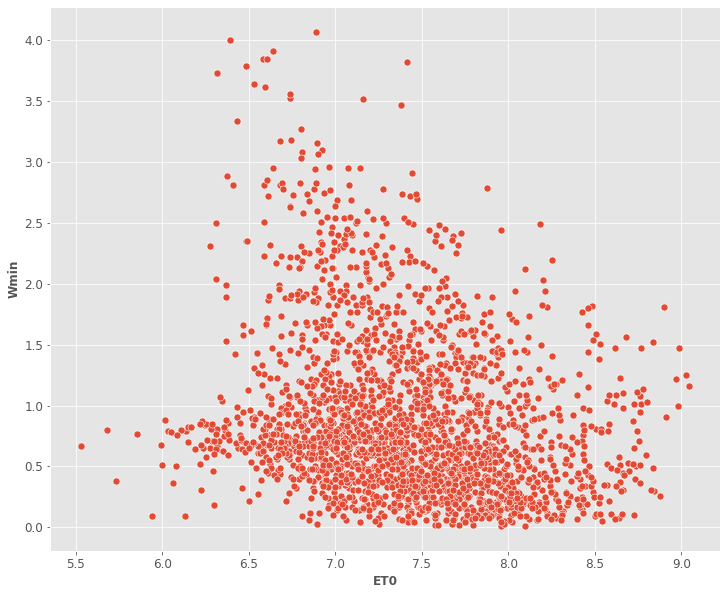

In [ ]:
sns.scatterplot(df['ET0'],df['Wmin'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


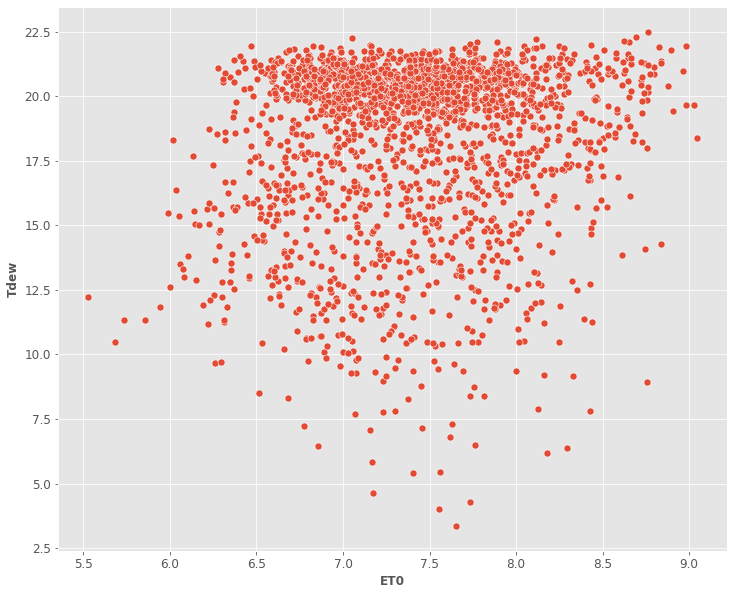

In [ ]:
sns.scatterplot(df['ET0'],df['Tdew'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


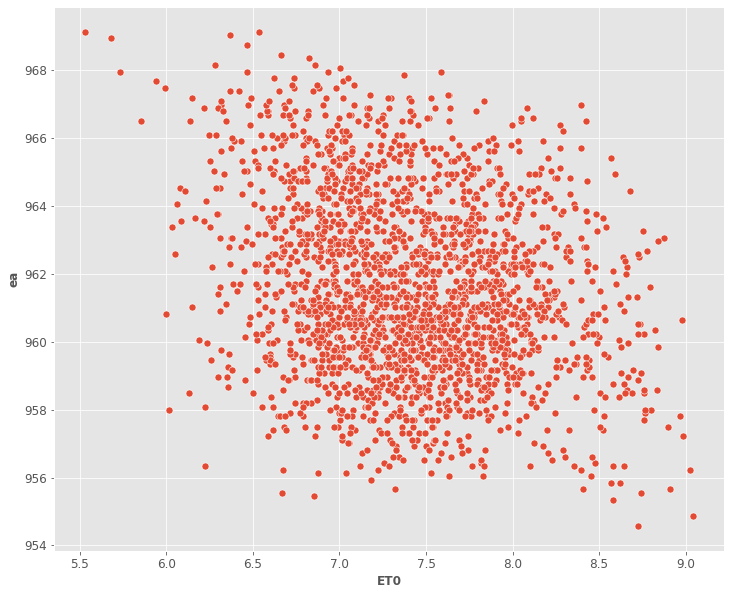

In [ ]:
sns.scatterplot(df['ET0'],df['ea'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


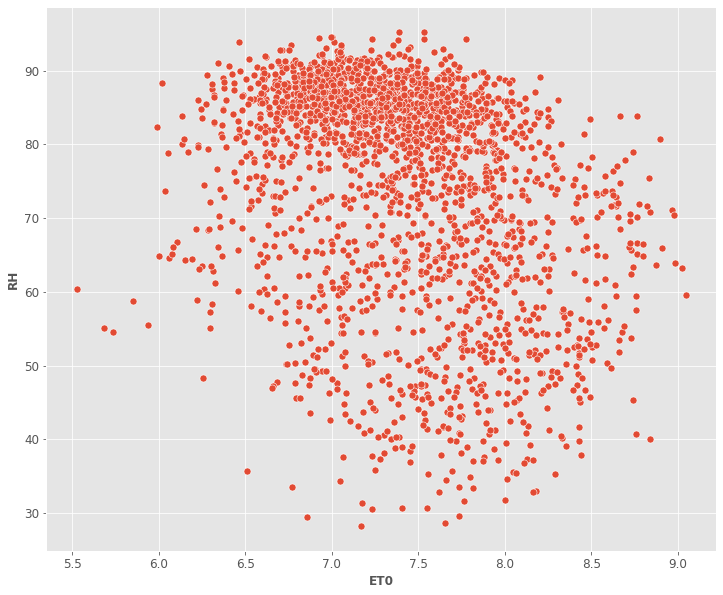

In [ ]:
sns.scatterplot(df['ET0'],df['RH'],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


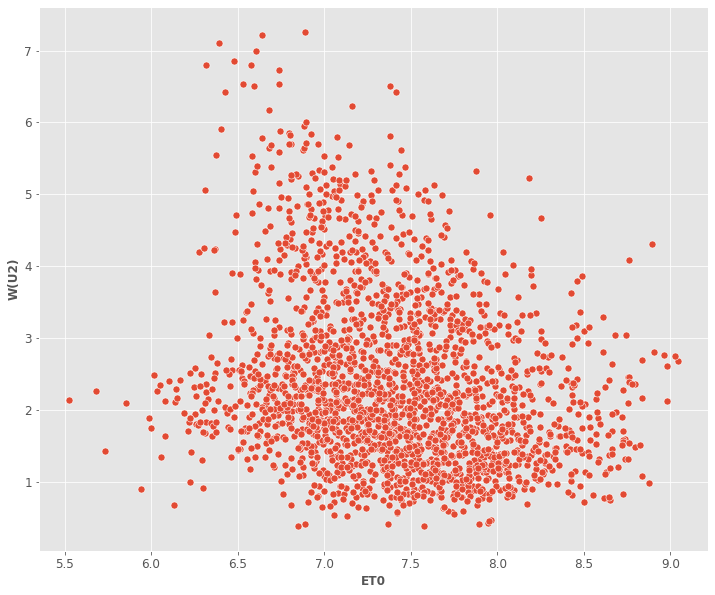

In [ ]:
sns.scatterplot(df['ET0'],df['W(U2)'],s=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefc8f91910>]],
      dtype=object)

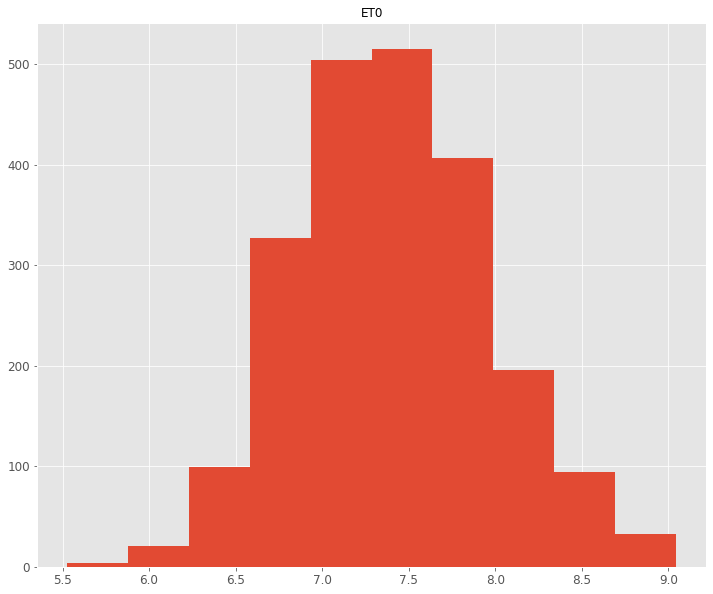

In [ ]:
df.hist(column='ET0')

ET0 AVERAGE


In [ ]:
x=df['ET0'].sum()
y=len(df['ET0'])
ETO_average = x/y
print(f"ET0  average is equal to = {ETO_average} ")


ET0  average is equal to = 7.403666432861818 


Implementation of Naive Bayes

In [ ]:
X = df.iloc[:, [1,2,9,10]].values
y = df.iloc[:, -1].values
y=y.astype(int) 

Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Feature scaling
Next, we are doing feature scaling to the training and test set of independent variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Naive Bayes model on the training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred  

array([7, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 8, 7, 7, 7, 6, 7, 7, 7, 7, 6,
       5, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7,
       7, 7, 7, 5, 8, 7, 7, 6, 7, 6, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 9,
       7, 7, 9, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 5, 6, 7, 7, 7, 8, 8, 8,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       6, 7, 6, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 6,
       7, 7, 7, 6, 7, 7, 7, 8, 7, 5, 5, 6, 7, 7, 6, 7, 7, 7, 7, 8, 7, 7,
       6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 8, 8, 7, 7, 7, 7, 7, 5, 7, 7, 8, 6,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 6, 7, 8, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 8, 7, 7, 7,
       7, 8, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6,
       7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 6, 6, 6, 7, 7, 7, 6,
       7, 7, 6, 7, 6, 7, 8, 7, 7, 7, 7, 6, 7, 7, 7,

In [ ]:
y_test

array([7, 7, 7, 6, 5, 7, 6, 7, 7, 6, 7, 7, 8, 6, 7, 6, 6, 8, 6, 7, 7, 6,
       5, 8, 8, 6, 7, 7, 6, 7, 6, 7, 6, 7, 7, 8, 7, 7, 7, 6, 6, 7, 7, 7,
       7, 6, 6, 6, 8, 6, 7, 6, 7, 7, 8, 6, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7,
       6, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 8, 6, 7, 6, 7, 7, 6,
       6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 8, 6, 6, 7, 7, 8, 7, 7, 7, 8, 6, 6,
       7, 7, 7, 6, 8, 7, 7, 8, 7, 5, 6, 6, 7, 6, 7, 7, 7, 8, 7, 7, 8, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 8, 8, 6, 7, 6, 8, 7, 6, 6, 7, 8, 6,
       6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 8, 6, 7, 7, 7, 7, 6, 7, 8, 7, 7, 6,
       7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 7, 7, 7, 8, 8, 6, 7,
       7, 8, 7, 7, 7, 6, 7, 7, 7, 7, 7, 8, 7, 7, 7, 6, 6, 7, 8, 7, 7, 6,
       7, 6, 7, 8, 6, 7, 7, 7, 7, 7, 7, 6, 8, 7, 7, 7, 7, 5, 7, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 6, 7, 8, 7,

We can evaluate our matrix using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
cm
print(f"the accuracy is equal to = {accuracy}")

the accuracy is equal to = 0.6704545454545454


Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Feature Selection
Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
feature_cols = ['Tmin', 'Tmax', 'ea', 'RH','W(U2)','Tdew','Wmin']
X = df[feature_cols] # Features
y = df.ET0 # Target variable
y=y.astype(int)

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.



In [ ]:
"""Split dataset into training set and test set"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6257575757575757


considered as good accuracy. Better than than Naive Bais

Visualizing Decision Trees

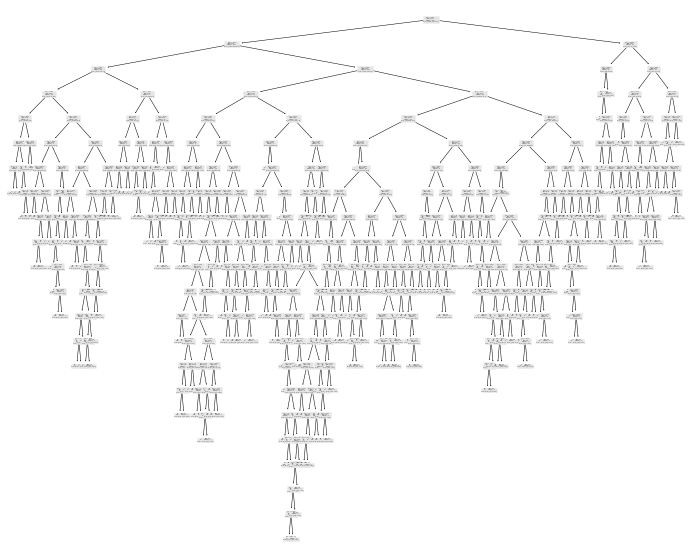

In [ ]:
from sklearn import tree
tree.plot_tree(clf);

LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split

X=df['ET0']
train_X, test_X= train_test_split(X,train_size=0.85,test_size=0.15, random_state=2220)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
Z = df[['Tmin', 'Tmax', 'RAIN_FALL(mm)','Tdew']]

In [ ]:
from sklearn.model_selection import train_test_split


train_Z, test_Z= train_test_split(Z,train_size=0.85,test_size=0.15, random_state=2220)


In [ ]:
lm.fit(test_Z, test_X)

LinearRegression()

In [ ]:
lm.intercept_
lm.coef_
lm.score(test_Z, test_X)


0.6331581375500803

In [ ]:
lm.predict(test_Z)

array([7.33771858, 7.36025492, 7.85408791, 7.96387349, 7.70364876,
       7.02865831, 7.46256366, 7.08113249, 7.4709985 , 8.17266248,
       7.44538079, 6.76451195, 7.18188111, 7.46933714, 7.07179747,
       7.5306309 , 7.63742149, 6.94190223, 6.90763174, 8.31659555,
       7.48469353, 7.55438832, 7.24596667, 7.72470831, 6.76477379,
       6.89453139, 7.01487252, 8.15573663, 8.283089  , 7.31125332,
       7.91675928, 8.03926781, 6.7399021 , 7.27197082, 6.99384938,
       7.25553949, 8.15548658, 8.280057  , 7.63855719, 7.86686416,
       7.50930851, 6.49610752, 7.18673332, 8.30069424, 7.63889227,
       7.44261437, 7.25110786, 7.08004731, 8.14207086, 7.95117282,
       7.74209671, 7.13280507, 7.3929078 , 7.62946896, 6.85215009,
       6.90440835, 7.39381667, 7.17695368, 8.25866769, 6.47510322,
       7.76106484, 7.44577607, 7.50930588, 7.26863091, 7.81180444,
       7.09315361, 7.0665024 , 7.34105415, 7.76395247, 6.58135377,
       7.36470038, 6.72716078, 7.19576686, 7.02617483, 7.46426

In [ ]:
print('The R-square is: ', lm.score(test_Z, test_X))

The R-square is:  0.6331581375500803


In [ ]:
from sklearn.metrics import mean_squared_error
Predict=lm.predict(test_Z)
print('The mean square error of ET0 and predicted value using multifit is: ', \
      mean_squared_error(test_X,Predict))

The mean square error of ET0 and predicted value using multifit is:  0.11431681542751898


In [ ]:
Z1 = df[[ 'Tmax']]
from sklearn.model_selection import train_test_split


train_Z1, test_Z1= train_test_split(Z1,train_size=0.85,test_size=0.15, random_state=2220)
lm.fit(test_Z1, test_X)



LinearRegression()

In [ ]:
lm.predict(test_Z1)

array([7.08679297, 7.15733687, 7.64662214, 7.82117307, 7.87905525,
       6.99363884, 7.68732054, 7.19532205, 7.19532205, 7.72259249,
       7.23602045, 7.17361623, 7.3617333 , 7.74429831, 7.41871107,
       7.25229981, 7.35540244, 7.19260882, 7.15371923, 7.92156247,
       7.31018199, 7.5625121 , 7.40966698, 7.28033649, 7.52000488,
       7.45760066, 7.17542505, 8.16756172, 7.76057767, 7.66109268,
       7.86006266, 7.68822495, 7.1401531 , 7.34002749, 7.60592373,
       7.12658696, 8.00024606, 7.88719493, 7.67465882, 7.96949615,
       7.48563734, 7.09945469, 7.22245432, 8.13862063, 7.60321051,
       7.83021716, 7.05061661, 7.17904268, 8.1648485 , 8.04184887,
       7.98215788, 7.20527055, 7.15643246, 7.25772627, 7.49649024,
       7.0497122 , 7.23692486, 6.99092561, 8.10967955, 7.33460103,
       7.32736576, 7.39700525, 7.35268921, 7.20255732, 7.94598152,
       7.35630685, 7.06237392, 7.27762327, 8.0644591 , 7.12387374,
       7.18446914, 7.50462992, 7.20888818, 7.21702786, 7.21431

In [ ]:
lm.intercept_
lm.coef_
lm.score(test_Z1, test_X)


0.35184073657492854

In [ ]:
print('The R-square is: ', lm.score(test_Z1, test_X))

The R-square is:  0.35184073657492854


In [ ]:
from sklearn.metrics import mean_squared_error
Predict=lm.predict(test_Z1)
print('The mean square error of ET0 and predicted value using multifit is: ', \
      mean_squared_error(test_X,Predict))

The mean square error of ET0 and predicted value using multifit is:  0.2019821358166719


As we can see using only one variable decreases the value of R squared compared to multi variable regression. So it is better to use multiple variables to predict our ET0 values.